<a href="https://colab.research.google.com/github/ruizleandro/Loan-Classification-with-LightGBM/blob/master/Loan_Classification_with_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving loan_classification_data.csv to loan_classification_data.csv
User uploaded file "loan_classification_data.csv" with length 2487678 bytes


In [3]:
df = pd.read_csv('loan_classification_data.csv')

In [4]:
df.head(10)

,loan_id,loan_purpose,is_first_loan,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,label
0,A_1,personal,1,7900,0.80,1103,6393,1,16400,42,4,0
1,A_2,personal,0,3300,0.29,2588,832,1,75500,56,1,0
2,A_3,personal,0,7600,0.90,1651,8868,1,59000,46,1,0
3,A_4,personal,1,3400,0.38,1269,6863,1,26000,55,8,0
4,A_5,emergency,0,2600,0.89,1310,3423,1,9700,41,4,1
5,A_6,operations,0,7600,0.51,1040,2406,1,22900,52,0,0
6,A_7,operations,1,6900,0.82,2408,5556,1,34800,48,4,0
7,A_8,personal,0,5700,0.56,1933,4139,1,32500,64,2,0
8,A_9,personal,1,3400,0.95,3866,4131,1,13300,23,3,0
9,A_10,personal,0,2900,0.91,88,2725,1,21100,52,1,1


In [5]:
df = df.drop('loan_id', axis=1)
df.head(10)

,loan_purpose,is_first_loan,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,label
0,personal,1,7900,0.80,1103,6393,1,16400,42,4,0
1,personal,0,3300,0.29,2588,832,1,75500,56,1,0
2,personal,0,7600,0.90,1651,8868,1,59000,46,1,0
3,personal,1,3400,0.38,1269,6863,1,26000,55,8,0
4,emergency,0,2600,0.89,1310,3423,1,9700,41,4,1
5,operations,0,7600,0.51,1040,2406,1,22900,52,0,0
6,operations,1,6900,0.82,2408,5556,1,34800,48,4,0
7,personal,0,5700,0.56,1933,4139,1,32500,64,2,0
8,personal,1,3400,0.95,3866,4131,1,13300,23,3,0
9,personal,0,2900,0.91,88,2725,1,21100,52,1,1


In [6]:
df = pd.get_dummies(df)
df.head(10)

,is_first_loan,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,label,loan_purpose_emergency,loan_purpose_operations,loan_purpose_others,loan_purpose_personal,loan_purpose_property
0,1,7900,0.80,1103,6393,1,16400,42,4,0,0,0,0,1,0
1,0,3300,0.29,2588,832,1,75500,56,1,0,0,0,0,1,0
2,0,7600,0.90,1651,8868,1,59000,46,1,0,0,0,0,1,0
3,1,3400,0.38,1269,6863,1,26000,55,8,0,0,0,0,1,0
4,0,2600,0.89,1310,3423,1,9700,41,4,1,1,0,0,0,0
5,0,7600,0.51,1040,2406,1,22900,52,0,0,0,1,0,0,0
6,1,6900,0.82,2408,5556,1,34800,48,4,0,0,1,0,0,0
7,0,5700,0.56,1933,4139,1,32500,64,2,0,0,0,0,1,0
8,1,3400,0.95,3866,4131,1,13300,23,3,0,0,0,0,1,0
9,0,2900,0.91,88,2725,1,21100,52,1,1,0,0,0,1,0


# Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

x_data = df.copy().drop(['label'], axis=1)
y_data = df['label'].copy()

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.30,
                                                    random_state=42,
                                                    stratify=y_data)

print("Train samples: {}\nTest samples: {}".format(len(X_train), len(X_test)))

Train samples: 32725
Test samples: 14026


# Model Dev

In [8]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

estimator = lgb.LGBMClassifier(learning_rate=0.2, 
                               metric='l1', 
                               n_estimators=24, 
                               objetive='binary',
                               max_depth=7,
                               num_leaves=40,
                               is_unbalance=True,
                               max_bin=1000)

param_grid = {
    'n_estimators': [x for x in range(16,32)],
    'learning_rate': [0.2, 0.4, 0.6],
    'num_leaves':[25, 40, 70, 100],
    'max_depth':[5, 7, 10],
    'max_bin':[50, 100, 200]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_error'],
        early_stopping_rounds = 5)

Streaming output truncated to the last 5000 lines.
[8]	valid_0's binary_error: 0.0908313	valid_0's auc: 0.970817	valid_0's l1: 0.119747
[9]	valid_0's binary_error: 0.0905461	valid_0's auc: 0.970955	valid_0's l1: 0.118147
[10]	valid_0's binary_error: 0.0901184	valid_0's auc: 0.97064	valid_0's l1: 0.116507
[11]	valid_0's binary_error: 0.0899045	valid_0's auc: 0.970522	valid_0's l1: 0.115854
[12]	valid_0's binary_error: 0.0892628	valid_0's auc: 0.970167	valid_0's l1: 0.114609
[13]	valid_0's binary_error: 0.0894054	valid_0's auc: 0.970111	valid_0's l1: 0.11389
[14]	valid_0's binary_error: 0.0894054	valid_0's auc: 0.97004	valid_0's l1: 0.113478
Early stopping, best iteration is:
[9]	valid_0's binary_error: 0.0905461	valid_0's auc: 0.970955	valid_0's l1: 0.118147
[1]	valid_0's binary_error: 0.0998859	valid_0's auc: 0.956163	valid_0's l1: 0.275326
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_error: 0.0992443	valid_0's auc: 0.963388	valid_0's l1: 0.204457
[

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      is_unbalance=True, learning_rate=0.2,
                                      max_bin=1000, max_depth=7, metric='l1',
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=24,
                                      n_jobs=-1, num_leaves=40, objective=None,
                                      objetive='bin...
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': 

In [9]:
gridsearch.best_params_

{'learning_rate': 0.2,
 'max_bin': 50,
 'max_depth': 10,
 'n_estimators': 29,
 'num_leaves': 40}

In [13]:
lightgbm = lgb.LGBMClassifier(learning_rate=0.2, 
                              n_estimators=29,
                              max_depth=10,
                              num_leaves=40,
                              is_unbalance=True,
                              max_bin=50)
lightgbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_error'],
early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.515684	valid_0's binary_error: 0.346571	valid_0's auc: 0.958587
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.435493	valid_0's binary_error: 0.0969628	valid_0's auc: 0.962071
[3]	valid_0's binary_logloss: 0.379884	valid_0's binary_error: 0.0929702	valid_0's auc: 0.964473
[4]	valid_0's binary_logloss: 0.340067	valid_0's binary_error: 0.0921146	valid_0's auc: 0.966215
[5]	valid_0's binary_logloss: 0.310679	valid_0's binary_error: 0.0933267	valid_0's auc: 0.967006
[6]	valid_0's binary_logloss: 0.289072	valid_0's binary_error: 0.0939683	valid_0's auc: 0.967094
[7]	valid_0's binary_logloss: 0.272102	valid_0's binary_error: 0.0943248	valid_0's auc: 0.967871
[8]	valid_0's binary_logloss: 0.259617	valid_0's binary_error: 0.0935406	valid_0's auc: 0.96792
[9]	valid_0's binary_logloss: 0.249416	valid_0's binary_error: 0.0928989	valid_0's auc: 0.968541
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.3

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', is_unbalance=True, learning_rate=0.2,
               max_bin=50, max_depth=10, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=29,
               n_jobs=-1, num_leaves=40, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## Model Prediction and Evaluation

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

y_pred = lightgbm.predict(X_test, num_iteration=lightgbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null accuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.9078853557678597
The roc_auc_score of prediction is: 0.9115936285698222
The null accuracy is: 0.653429345501212


Confusion matrix, without normalization
[[8244  921]
 [ 371 4490]]
Normalized confusion matrix
[[0.899509   0.100491  ]
 [0.07632174 0.92367826]]


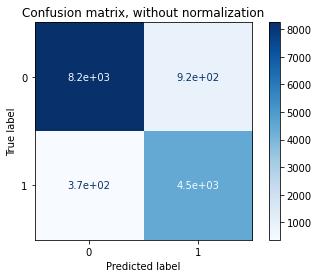

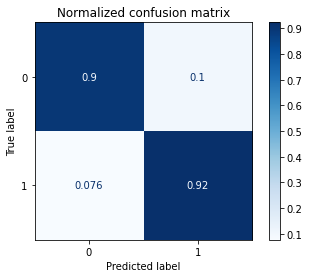

In [15]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lightgbm, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Feature Importances

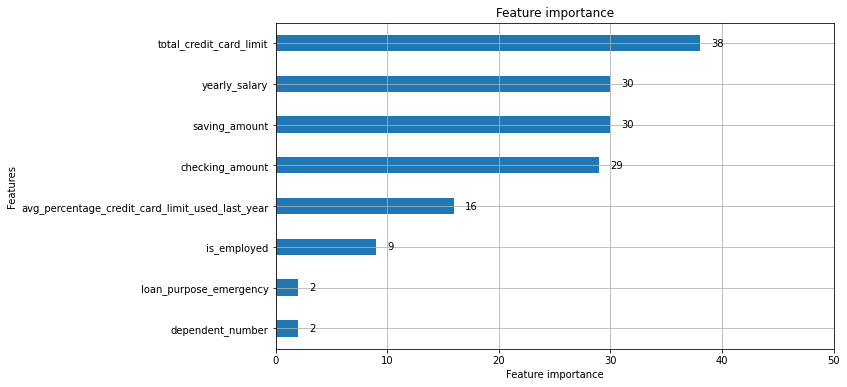

In [18]:
ax = lgb.plot_importance(lightgbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,50), ylim = (-.5, 7.5), 
                         figsize = (10,6))
plt.show()